In [ ]:
from keras.models import load_model
from VectorProcessing import GramGloveSentenceVector

Using TensorFlow backend.


In [2]:
classifier_path = "/home/sumit/Desktop/project17/ResumeParser/Data/resume_segments/Test/classifier5"
file_path = "/home/sumit/Desktop/project17/ResumeParser/Data/resume_segments/Test/sample.txt"

In [3]:
gsv = GramGloveSentenceVector(file_path,dimension=300, training=False)
sen2vec = gsv.get_5gram_sentenceVector()
print len(sen2vec), len(sen2vec[0])

126 1500


In [4]:
classifier = load_model(classifier_path)

In [5]:
import numpy as np
y_pred = classifier.predict(np.array(sen2vec))

In [6]:
with open(file_path, 'r') as f:
    content = f.readlines()
count = 0
labels = ['basic', 'experience', 'education', 'certificate', 'extra', 'skills', 'projects','summary', 'mimc']
for line in content:
    print line ,'=>', labels[np.argmax(y_pred, 1)[count]]
    count += 1

SUMIT RATHORE
=> basic
Web Developer
=> basic
8800904192       sumitrathore1313@gmail.com
=> skills
CAREER OBJECTIVE
=> experience
Self-motivated and hardworking fresher seeking for an opportunity to work in a challenging environment to prove my skills and utilize my knowledge & intelligence in the growth of the organization.
=> summary
WORK EXPERIENCE
=> experience
Arbunize, Delhi, Delhi
=> experience
Internship, Jun 2017 – Jul 2017
=> experience
Web Developer
=> experience
Design, build, or maintain web sites, using authoring or scripting languages, content creation tools, management tools, and digital media.
=> experience

=> education
EDUCATION
=> education
Ims Engineering College, Ghaziabad, Uttar Pradesh
=> education
B Tech Computer Science and Engineering Candidate, Expected graduation, Aug 2018
=> education
I got 68% till third year of my B Tech
=> education

=> education
Bhartiya Vidya Peeth Sr. Sec School, Agra, Uttar Pradesh
=> education
Secondary School Examination(10th), A

In [7]:
import matplotlib.pyplot as plt
index = np.arange(len(y_pred))
index = np.reshape(index, (-1, 1))
#print index
y_pred = np.append(y_pred, index, axis=1)
print y_pred.shape

(126, 10)


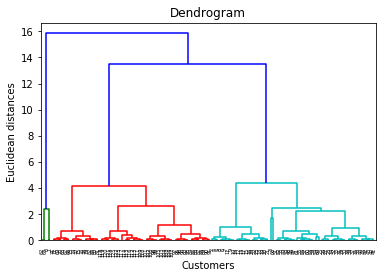

In [8]:
data = y_pred[:, [0, -1]]
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data = sc_X.fit_transform(data)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

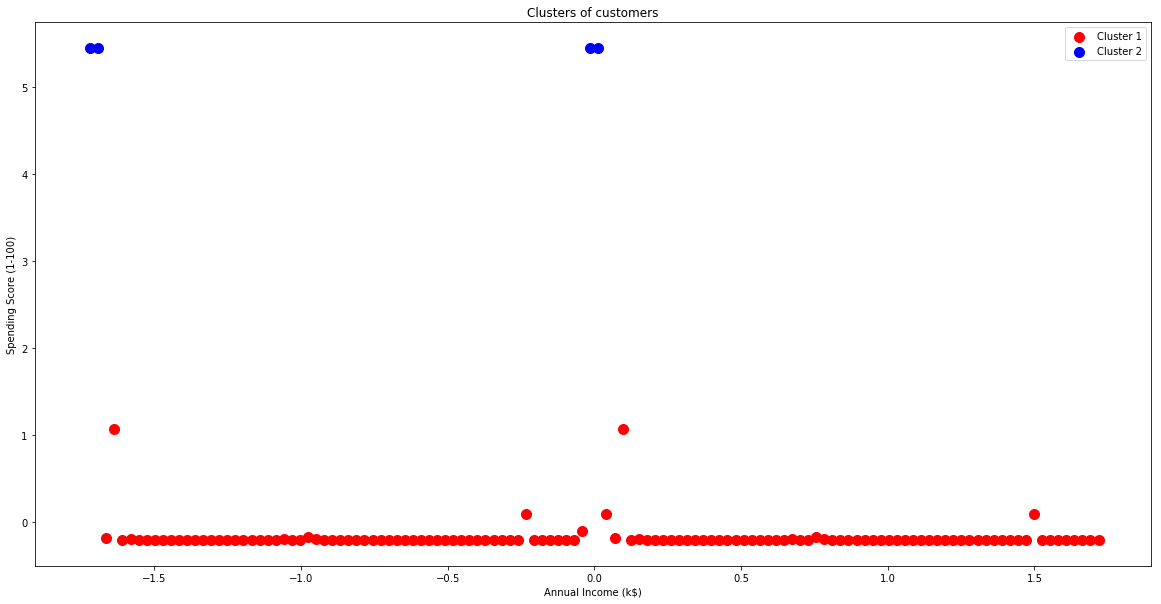

In [10]:
X = data
plt.figure(figsize=(20,10))
plt.scatter(X[y_hc == 0, 1], X[y_hc == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 1], X[y_hc == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()